In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, AvgPool2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

3


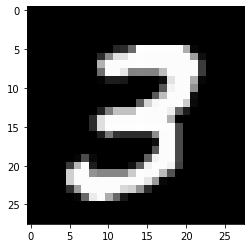

In [3]:
plt.imshow(x_train[7],cmap="gray")
print(y_train[7])

In [4]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
print(y_train_cat[7])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [5]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [6]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu',input_shape = (28,28,1)))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=16,kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))


model.add(Flatten())
model.add(Dense(84,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 6)          0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          880       
                                                                 
 average_pooling2d_2 (Averag  (None, 3, 3, 16)         0

In [12]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 

In [13]:
model.fit(x_train,y_train_cat,epochs=10,batch_size=128,validation_data=(x_test, y_test_cat))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6064 - accuracy: 0.8123 - val_loss: 0.2586 - val_accuracy: 0.9162
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1940 - accuracy: 0.9416 - val_loss: 0.1288 - val_accuracy: 0.9597
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1360 - accuracy: 0.9585 - val_loss: 0.1066 - val_accuracy: 0.9671
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1107 - accuracy: 0.9655 - val_loss: 0.0891 - val_accuracy: 0.9724
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0957 - accuracy: 0.9711 - val_loss: 0.0755 - val_accuracy: 0.9763
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9744 - val_loss: 0.0749 - val_accuracy: 0.9747
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0747 - accuracy: 0.9765 - val_loss: 0.0563 - val_accuracy: 0.9815
Epoch 

In [14]:
score = model.evaluate(x_test, y_test_cat)


313/313 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9846


In [15]:
y_pred=model.predict(x_test)
y_pred.shape

(10000, 10)

In [16]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [17]:
x_test.shape

(10000, 28, 28)

[7.3646633e-10 2.0716258e-09 1.0000000e+00 1.9349926e-10 1.2022761e-13
 6.8012773e-15 2.6379992e-14 5.7903375e-09 1.3078488e-10 4.1283945e-15]
2


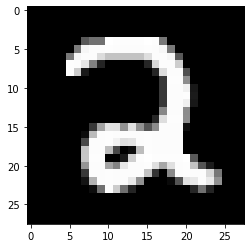

In [18]:
plt.imshow(x_test[503],cmap="gray")
print(y_pred[503])
print(y_pred1[503])

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred1,y_test))
print(accuracy_score(y_pred1,y_test))


[[ 975    0    0    2    0    2    4    1    6    2]
 [   0 1130    4    1    0    0    1    1    0    3]
 [   1    1 1021    2    1    0    0   11    4    2]
 [   0    0    0  992    0    7    0    1    1    2]
 [   1    0    0    0  972    0    2    1    4    9]
 [   0    0    0    3    0  874    3    0    2    5]
 [   1    2    0    0    6    3  947    0    4    0]
 [   1    1    5    6    0    0    0 1005    2    4]
 [   1    1    2    4    0    3    1    1  948    0]
 [   0    0    0    0    3    3    0    7    3  982]]
0.9846
